In [1]:
from torchvision.models.segmentation import fcn_resnet50
import cv2
import torch


In [2]:
model = fcn_resnet50(pretrained=True, progress=True, num_classes=21, aux_loss=None)
model.eval()

In [8]:
from torchvision import transforms
from matplotlib import pyplot as plt

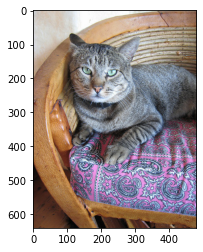

In [9]:
from PIL import Image 
import matplotlib.pyplot as plt 
import torch
# !wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png 
img = Image.open('cats/000000015355.jpg') 
plt.imshow(img)
plt.show()

In [10]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()


In [11]:
# Apply the transformations needed
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [16]:
# Pass the input through the net
out = model(inp)['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


In [17]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[ 0  8  9 18]


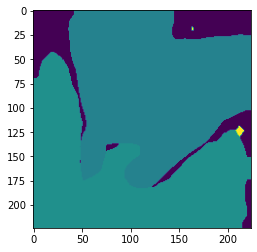

In [18]:
plt.imshow(om)

In [28]:
# Define the helper function
def decode_segmap(image, nc=21):
  
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

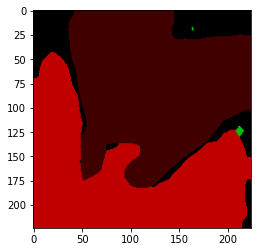

In [30]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [31]:
def segment(net, path, show_orig=True, dev='cuda'):
    img = Image.open(path)
    if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
    # Comment the Resize and CenterCrop for better inference results
    trf = T.Compose([T.Resize(640), 
#                    T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0).to(dev)
    out = net.to(dev)(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
#     plt.imshow(om)
    rgb = decode_segmap(om,nc=21)
    plt.imshow(rgb); plt.axis('off'); plt.show()

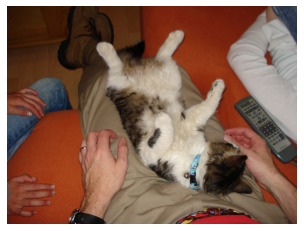

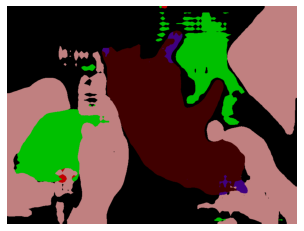

In [32]:
segment(model,'cats/000000000443.jpg')

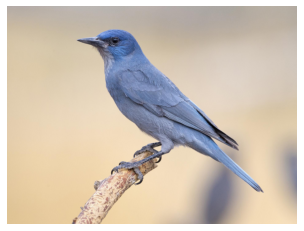

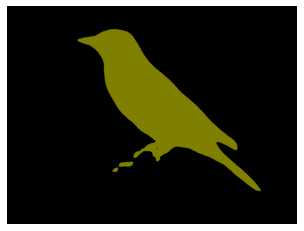

In [33]:
segment(fcn,'bird.jpg')